In [2]:
!pip install rouge-score
import nltk
import torch
from transformers import (
    BartForConditionalGeneration,
    BartTokenizer,
    PegasusForConditionalGeneration,
    PegasusTokenizer,
    T5ForConditionalGeneration,
    T5Tokenizer
)
from nltk.tokenize import sent_tokenize
from rouge_score import rouge_scorer
import re
from typing import Dict, List
nltk.download('punkt')
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=2bcfc143eee44dd9952f450c2135a3fa19d222b44f7c097b5997c9ae2a03c778
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Loading bart-cnn...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loading bart-xsum...


config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loading pegasus-cnn...


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Loading pegasus-xsum...


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

Loading t5-cnn...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



Generating summary using bart-cnn...

Generating summary using bart-xsum...

Generating summary using pegasus-cnn...

Generating summary using pegasus-xsum...

Generating summary using t5-cnn...
=== Generated Summaries ===


BART-CNN Summary:
- Gautama Buddha was born as Prince Siddhartha Gautama in Lumbini (modern-day Nepal) around the 6th century BCE.
- He renounced his princely life and became an ascetic.
- At the age of 35, while meditating under the Bodhi tree in Bodh Gaya, he attained enlightenment and became the Buddha.
- For the rest of his life, Buddha traveled across India, teaching the principles of Dharma, the truths he discovered, and the path to Nirvana—liberation from the cycle of birth, death, and rebirth.


BART-XSUM Summary:
- Siddhartha Buddha, or "The Awakened One," was the first person to achieve enlightenment, and is considered the Buddha by Buddhists and other religious traditions around the world.
- the Buddha's teachings spread widely, became the foundation of

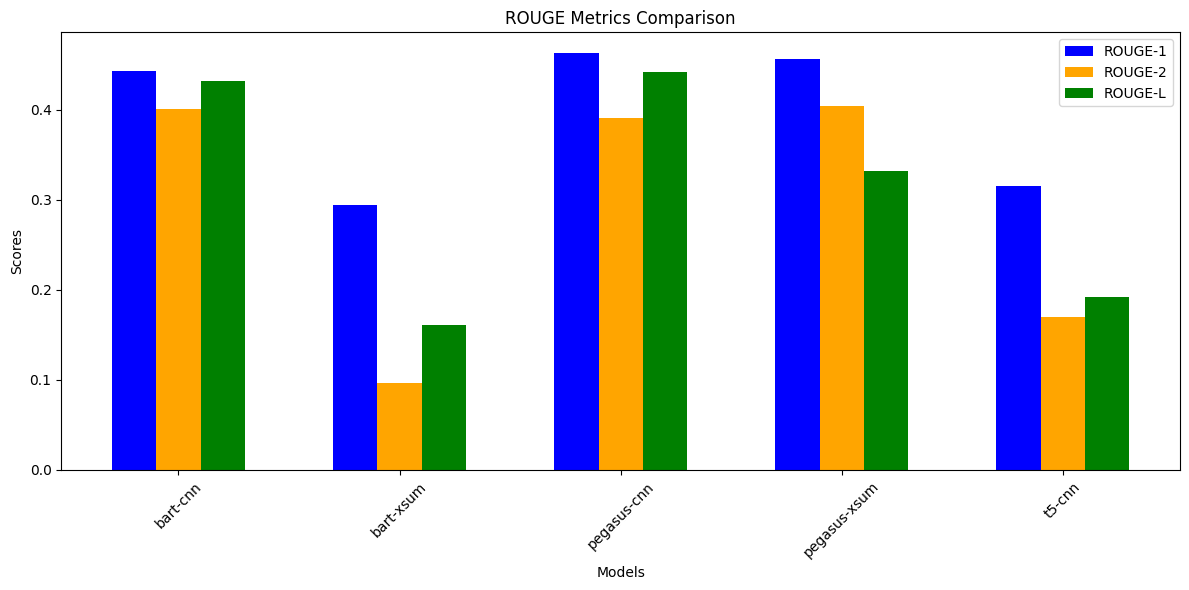

<ipython-input-3-36f26ddcdbc5>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=length_ratios, palette='Blues_d')


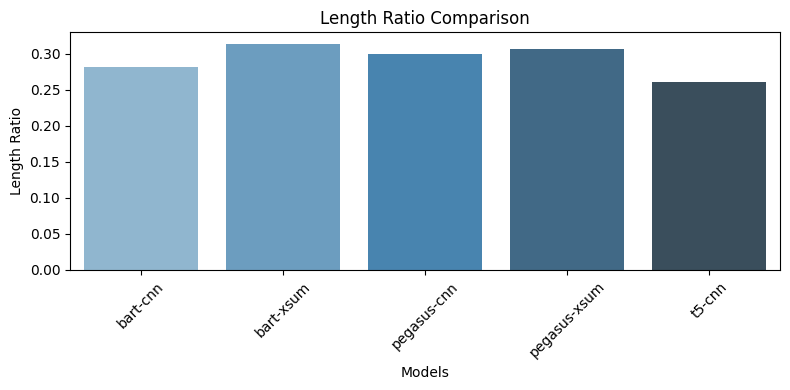

In [3]:




class MultiModelSummarizer:
    def __init__(self):
        self.models = {
            'bart-cnn': {
                'name': 'facebook/bart-large-cnn',
                'model_class': BartForConditionalGeneration,
                'tokenizer_class': BartTokenizer
            },
            'bart-xsum': {
                'name': 'facebook/bart-large-xsum',
                'model_class': BartForConditionalGeneration,
                'tokenizer_class': BartTokenizer
            },
            'pegasus-cnn': {
                'name': 'google/pegasus-cnn_dailymail',
                'model_class': PegasusForConditionalGeneration,
                'tokenizer_class': PegasusTokenizer
            },
            'pegasus-xsum': {
                'name': 'google/pegasus-xsum',
                'model_class': PegasusForConditionalGeneration,
                'tokenizer_class': PegasusTokenizer
            },
            't5-cnn': {
                'name': 't5-base',  # Fine-tuned on CNN/DailyMail
                'model_class': T5ForConditionalGeneration,
                'tokenizer_class': T5Tokenizer
            }
        }

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

        # Initialize models and tokenizers
        self.loaded_models = {}
        self.loaded_tokenizers = {}
        for model_key, model_info in self.models.items():
            print(f"Loading {model_key}...")
            self.loaded_models[model_key] = model_info['model_class'].from_pretrained(model_info['name']).to(self.device)
            self.loaded_tokenizers[model_key] = model_info['tokenizer_class'].from_pretrained(model_info['name'])

    def clean_text(self, text: str) -> str:
        cleaned_text = re.sub(r'\s+', ' ', text)
        cleaned_text = cleaned_text.replace("'", "")
        return cleaned_text.strip()

    def create_chunks(self, text: str, tokenizer, max_length: int = 1024, overlap: int = 2) -> List[str]:
        sentences = sent_tokenize(text)
        chunks = []
        chunk = []
        current_length = 0

        sentence_tokens = [tokenizer.encode(sentence, add_special_tokens=False) for sentence in sentences]
        sentence_lengths = [len(tokens) for tokens in sentence_tokens]

        i = 0
        while i < len(sentences):
            current_chunk = []
            current_length = 0
            start = i

            while i < len(sentences) and current_length + sentence_lengths[i] <= max_length:
                current_chunk.append(sentences[i])
                current_length += sentence_lengths[i]
                i += 1

            if i < len(sentences):
                i = i - overlap if i - overlap > start else start

            chunks.append(' '.join(current_chunk))

        return chunks

    def calculate_metrics(self, original_text: str, summaries: Dict[str, str]) -> Dict[str, Dict]:
        metrics = {}
        for model_name, summary in summaries.items():
            scores = self.rouge_scorer.score(original_text, summary)
            metrics[model_name] = {
                'rouge1': scores['rouge1'].fmeasure,
                'rouge2': scores['rouge2'].fmeasure,
                'rougeL': scores['rougeL'].fmeasure,
                'length_ratio': len(summary.split()) / len(original_text.split())
            }
        return metrics

    def summarize_text(self, input_text: str, min_length_ratio: float = 0.28, max_length_ratio: float = 0.40) -> Dict:
        cleaned_text = self.clean_text(input_text)
        results = {'summaries': {}, 'metrics': {}}

        for model_key in self.models.keys():
            print(f"\nGenerating summary using {model_key}...")
            model = self.loaded_models[model_key]
            tokenizer = self.loaded_tokenizers[model_key]

            # Calculate desired length
            input_tokens = tokenizer.encode(cleaned_text, add_special_tokens=False)
            total_input_length = len(input_tokens)
            desired_min_length = int(total_input_length * min_length_ratio)
            desired_max_length = int(total_input_length * max_length_ratio)

            # Create chunks
            chunks = self.create_chunks(cleaned_text, tokenizer)
            chunk_min_length = max(20, desired_min_length // len(chunks))
            chunk_max_length = max(chunk_min_length + 20, desired_max_length // len(chunks))

            # Generate summaries for chunks
            chunk_summaries = []
            for chunk in chunks:
                inputs = tokenizer.encode(chunk, return_tensors='pt', max_length=1024, truncation=True).to(self.device)

                with torch.no_grad():
                    if isinstance(model, T5ForConditionalGeneration):
                        # T5 requires a specific format
                        inputs = tokenizer("summarize: " + chunk, return_tensors="pt", max_length=1024, truncation=True).to(self.device)

                    summary_ids = model.generate(
                        inputs['input_ids'] if isinstance(model, T5ForConditionalGeneration) else inputs,
                        max_length=chunk_max_length,
                        min_length=chunk_min_length,
                        num_beams=4,
                        length_penalty=2.0,
                        no_repeat_ngram_size=3,
                        early_stopping=True
                    )

                summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
                chunk_summaries.append(summary)

            # Combine chunk summaries
            results['summaries'][model_key] = ' '.join(chunk_summaries)

        # Calculate metrics for all summaries
        results['metrics'] = self.calculate_metrics(cleaned_text, results['summaries'])

        return results


import matplotlib.pyplot as plt
import seaborn as sns

# Visualization function
def visualize_metrics(metrics: Dict):
    models = list(metrics.keys())
    rouge1_scores = [metrics[model]['rouge1'] for model in models]
    rouge2_scores = [metrics[model]['rouge2'] for model in models]
    rougeL_scores = [metrics[model]['rougeL'] for model in models]
    length_ratios = [metrics[model]['length_ratio'] for model in models]

    # Set up the bar chart for ROUGE scores
    plt.figure(figsize=(12, 6))
    x = range(len(models))
    width = 0.2

    plt.bar(x, rouge1_scores, width, label='ROUGE-1', color='blue')
    plt.bar([i + width for i in x], rouge2_scores, width, label='ROUGE-2', color='orange')
    plt.bar([i + 2 * width for i in x], rougeL_scores, width, label='ROUGE-L', color='green')

    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('ROUGE Metrics Comparison')
    plt.xticks([i + width for i in x], models, rotation=45)
    plt.legend()

    # Show ROUGE metrics bar chart
    plt.tight_layout()
    plt.show()

    # Set up the bar chart for Length Ratios
    plt.figure(figsize=(8, 4))
    sns.barplot(x=models, y=length_ratios, palette='Blues_d')
    plt.xlabel('Models')
    plt.ylabel('Length Ratio')
    plt.title('Length Ratio Comparison')
    plt.xticks(rotation=45)

    # Show Length Ratios chart
    plt.tight_layout()
    plt.show()

def format_results(results: Dict) -> str:
    output = []

    # Add summaries
    output.append("=== Generated Summaries ===\n")
    for model_name, summary in results['summaries'].items():
        output.append(f"\n{model_name.upper()} Summary:")
        summary_sentences = sent_tokenize(summary)
        output.extend([f"- {sentence}" for sentence in summary_sentences])
        output.append("")

    # Add metrics comparison
    output.append("\n=== Metrics Comparison ===\n")
    metrics_table = ["Model      | ROUGE-1 | ROUGE-2 | ROUGE-L | Length Ratio"]
    metrics_table.append("-" * 55)

    for model_name, metrics in results['metrics'].items():
        metrics_row = f"{model_name:<10} | {metrics['rouge1']:7.3f} | {metrics['rouge2']:7.3f} | {metrics['rougeL']:7.3f} | {metrics['length_ratio']:11.3f}"
        metrics_table.append(metrics_row)

    output.extend(metrics_table)

    return "\n".join(output)

# Example usage
if __name__ == "__main__":
    # Example input text
    input_text = """
    Gautama Buddha, born as Prince Siddhartha Gautama in Lumbini (modern-day Nepal) around the 6th century BCE, is the founder of Buddhism. His life journey is a profound story of spiritual discovery. Born into a royal family, Siddhartha lived a life of luxury, sheltered from the harsh realities of the world. His father, King Śuddhodana, ensured that he was surrounded by beauty and pleasure, hoping to keep him from the suffering of life. However, at the age of 29, Siddhartha ventured outside the palace and encountered the "Four Sights"—an old man, a sick person, a corpse, and a wandering ascetic. These encounters deeply troubled him, leading him to realize that suffering is an inevitable part of life. Driven by a desire to understand the nature of suffering and its cessation, he renounced his princely life and became an ascetic. Siddhartha spent years practicing severe austerities, but found that extreme self-denial was not the path to enlightenment. Abandoning asceticism, he chose the "Middle Way," a balanced approach between indulgence and self-denial. At the age of 35, while meditating under the Bodhi tree in Bodh Gaya, Siddhartha attained enlightenment and became the Buddha, or "The Awakened One." He realized the Four Noble Truths: the existence of suffering, its cause (desire and attachment), the possibility of its cessation, and the path leading to its cessation, known as the Eightfold Path. For the rest of his life, Buddha traveled across India, teaching the principles of Dharma, the truths he discovered, and the path to Nirvana—liberation from the cycle of birth, death, and rebirth. His teachings spread widely, becoming the foundation of Buddhism, a spiritual tradition that continues to guide millions toward inner peace and enlightenment.
    """

    # Initialize and run the summarizer
    summarizer = MultiModelSummarizer()
    results = summarizer.summarize_text(input_text)

    # Print formatted results
    print(format_results(results))
    visualize_metrics(results['metrics'])